In [50]:
from platform import python_version
print('Phiên bản python sử dụng:',python_version())

Phiên bản python sử dụng: 3.9.5


In [51]:
import numpy as np
import pandas as pd
from scipy import stats
import statistics
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
# Đọc dữ liệu:
df = pd.read_csv('Inc_Exp_Data.csv')

In [53]:
# Hiển thị 5 hàng đầu của dữ liệu
df.head()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members
0,5000,8000,3,2000,64200,Under-Graduate,1
1,6000,7000,2,3000,79920,Illiterate,1
2,10000,4500,2,0,112800,Under-Graduate,1
3,10000,2000,1,0,97200,Illiterate,1
4,12500,12000,2,3000,147000,Graduate,1


In [54]:
# Xem thông tin dữ liệu trong df:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Mthly_HH_Income           50 non-null     int64 
 1   Mthly_HH_Expense          50 non-null     int64 
 2   No_of_Fly_Members         50 non-null     int64 
 3   Emi_or_Rent_Amt           50 non-null     int64 
 4   Annual_HH_Income          50 non-null     int64 
 5   Highest_Qualified_Member  50 non-null     object
 6   No_of_Earning_Members     50 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 2.9+ KB


Rút ra nhận xét:

Kích thước dữ liệu: 50 Hàng, 7 Cột
Không có giá trị trống (null/NA)
Loại dữ liệu gồm object (cột 5) và int64 (các cột còn lại)

array([[<AxesSubplot:title={'center':'Mthly_HH_Income'}>,
        <AxesSubplot:title={'center':'Mthly_HH_Expense'}>],
       [<AxesSubplot:title={'center':'No_of_Fly_Members'}>,
        <AxesSubplot:title={'center':'Emi_or_Rent_Amt'}>],
       [<AxesSubplot:title={'center':'Annual_HH_Income'}>,
        <AxesSubplot:title={'center':'No_of_Earning_Members'}>]],
      dtype=object)

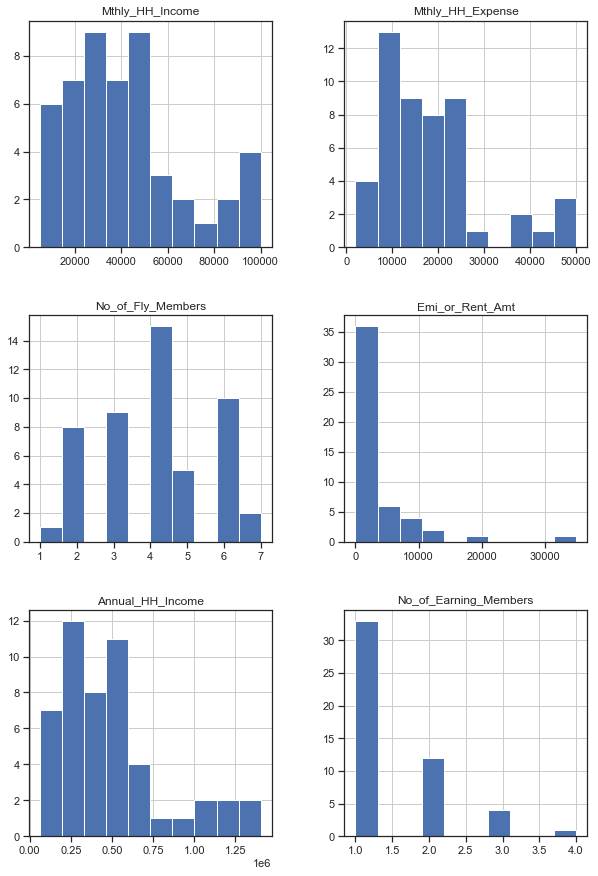

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline

df.hist(figsize=(10,15))

1. Mthly_HH_Income Variable - Thu nhập theo hộ gia đình hàng tháng

In [56]:
df.Mthly_HH_Income.describe()

count        50.000000
mean      41558.000000
std       26097.908979
min        5000.000000
25%       23550.000000
50%       35000.000000
75%       50375.000000
max      100000.000000
Name: Mthly_HH_Income, dtype: float64

C:\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Python39\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


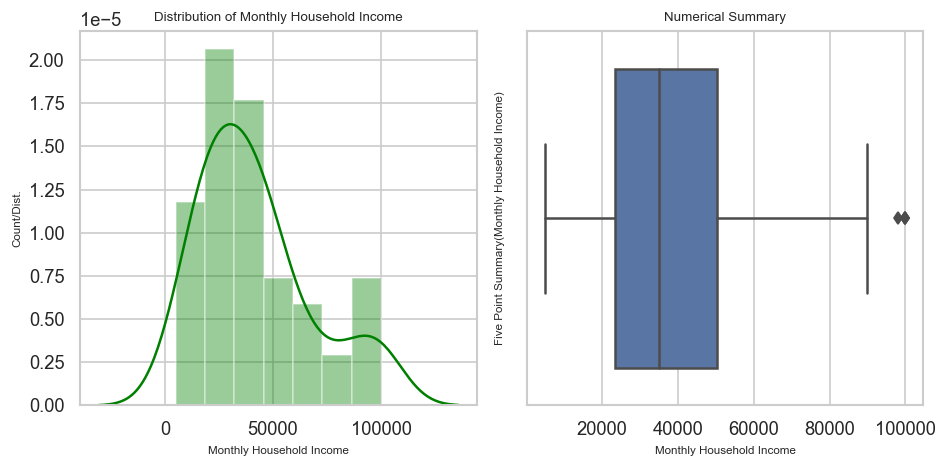

In [57]:
sns.set_style("whitegrid")
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))
plot0=sns.distplot(df[df['Mthly_HH_Income']!=0]['Mthly_HH_Income'],ax=axes[0],color='green')
axes[0].set_title('Distribution of Monthly Household Income',fontdict={'fontsize':8})
axes[0].set_xlabel('Monthly Household Income',fontdict={'fontsize':7})
axes[0].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
plt.tight_layout()

plot1=sns.boxplot(df[df['Mthly_HH_Income']!=0]['Mthly_HH_Income'],ax=axes[1],orient='v')
axes[1].set_title('Numerical Summary',fontdict={'fontsize':8})
axes[1].set_xlabel('Monthly Household Income',fontdict={'fontsize':7})
axes[1].set_ylabel(r'Five Point Summary(Monthly Household Income)',fontdict={'fontsize':7})
plt.tight_layout()

In [58]:
# Phân loại mức thu nhập hộ gia đình:
# Huge >= 80000$ , High >= 50000$ , Medium >= 20000$, Low < 20000$
b = [0, 20000, 50000, 80000, 100000]
type_df = df.copy()
type_df['Type_Income'] = pd.cut(type_df['Mthly_HH_Income'], b, labels = ['Low', 'Med', 'High', 'Huge'])
type_df.sample(5)

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members,Type_Income
26,39000,8000,4,0,556920,Under-Graduate,1,Med
8,19000,9000,2,0,218880,Under-Graduate,1,Low
37,50500,20000,3,0,581760,Professional,2,High
18,29000,6600,2,2000,348000,Graduate,1,Med
44,85000,25000,5,0,1142400,Under-Graduate,2,Huge


In [59]:
# Bảng thống kê mức thu nhập: (Type_Income)
type_inc = type_df.groupby('Type_Income')['Type_Income'].count()
type_inc = pd.DataFrame(type_inc)
type_inc.columns = ['Frequency']#tổng số, vd có tất cả 11 ở low
type_inc['Percent'] = type_inc/sum(type_inc['Frequency'])*100#tỉ lệ vd low chiếm 22%
type_inc

,Frequency,Percent
Type_Income,,
Low,11,22.0
Med,26,52.0
High,7,14.0
Huge,6,12.0


Text(0, 0.5, 'Percent')

<Figure size 576x576 with 0 Axes>

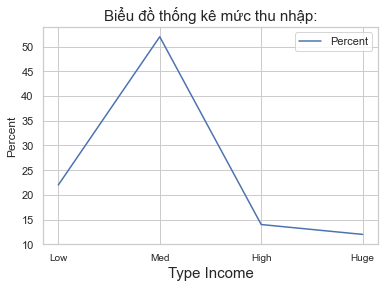

In [60]:
del type_inc['Frequency']
plt.figure(figsize=(8, 8))
type_inc.plot()
plt.xticks(fontsize=10)
plt.xticks(np.arange(4), ['Low', 'Med', 'High','Huge']) 
plt.title('Biểu đồ thống kê mức thu nhập:', fontsize=15)
plt.xlabel('Type Income', fontsize=15)
plt.ylabel('Percent', fontsize=12)

In [61]:
type_inc.reset_index(inplace=True)
type_inc

,Type_Income,Percent
0,Low,22.0
1,Med,52.0
2,High,14.0
3,Huge,12.0


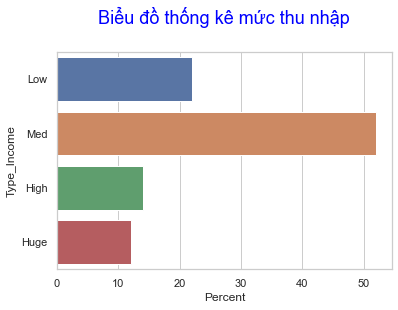

In [62]:
sns.barplot(y='Type_Income',x='Percent',data = type_inc )
plt.title('Biểu đồ thống kê mức thu nhập', color = 'Blue', y = 1.1, fontsize = 18)
plt.show()

2. Mthly_HH_Expense Variable - Chi tiêu hộ gia đình hàng tháng

In [63]:
df.Mthly_HH_Expense.describe()

count       50.000000
mean     18818.000000
std      12090.216824
min       2000.000000
25%      10000.000000
50%      15500.000000
75%      25000.000000
max      50000.000000
Name: Mthly_HH_Expense, dtype: float64

C:\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Python39\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


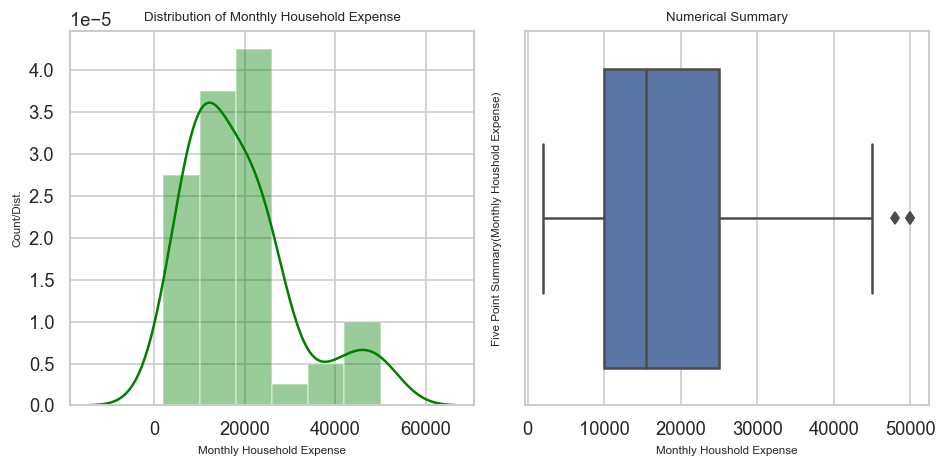

In [64]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))
plot0=sns.distplot(df[df['Mthly_HH_Expense']!=0]['Mthly_HH_Expense'],ax=axes[0],color='green')
axes[0].set_title('Distribution of Monthly Household Expense',fontdict={'fontsize':8})
axes[0].set_xlabel('Monthly Household Expense',fontdict={'fontsize':7})
axes[0].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
plt.tight_layout()

plot1=sns.boxplot(df[df['Mthly_HH_Expense']!=0]['Mthly_HH_Expense'],ax=axes[1],orient='v')
axes[1].set_title('Numerical Summary',fontdict={'fontsize':8})
axes[1].set_xlabel('Monthly Houshold Expense',fontdict={'fontsize':7})
axes[1].set_ylabel(r'Five Point Summary(Monthly Houshold Expense)',fontdict={'fontsize':7})
plt.tight_layout()

3. Annual_HH_Income Variable - Thu nhập hộ gia đình hàng năm

In [65]:
df.Annual_HH_Income.describe()

count    5.000000e+01
mean     4.900190e+05
std      3.201358e+05
min      6.420000e+04
25%      2.587500e+05
50%      4.474200e+05
75%      5.947200e+05
max      1.404000e+06
Name: Annual_HH_Income, dtype: float64

C:\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


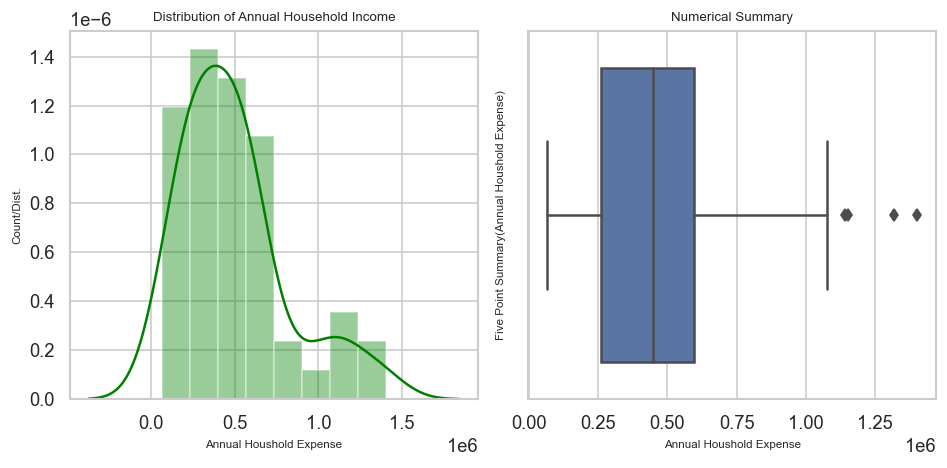

In [66]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))
plot0=sns.distplot(df[df['Annual_HH_Income']!=0]['Annual_HH_Income'],ax=axes[0],color='green')
axes[0].set_title('Distribution of Annual Household Income',fontdict={'fontsize':8})
axes[0].set_xlabel('Annual Houshold Expense',fontdict={'fontsize':7})
axes[0].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
plt.tight_layout()

plot1=sns.boxplot(df[df['Annual_HH_Income']!=0]['Annual_HH_Income'],ax=axes[1])
axes[1].set_title('Numerical Summary',fontdict={'fontsize':8})
axes[1].set_xlabel('Annual Houshold Expense',fontdict={'fontsize':7})
axes[1].set_ylabel(r'Five Point Summary(Annual Houshold Expense)',fontdict={'fontsize':7})
plt.tight_layout()

4. Highest_Qualified_Member Variable - Trình độ học vấn cao nhất

In [67]:
# Chuyển giá trị về dạng số
type_df = type_df.replace(to_replace =["Illiterate", "Under-Graduate", 'Graduate', 'Post-Graduate', 'Professional'], 
                            value =[1,2,3,4,5])
type_df.sample(5)

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members,Type_Income
47,100000,30000,6,0,1404000,3,3,Huge
26,39000,8000,4,0,556920,2,1,Med
10,20000,18000,4,8000,278400,2,2,Low
8,19000,9000,2,0,218880,2,1,Low
40,60000,50000,6,10000,590400,3,1,High


C:\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Python39\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


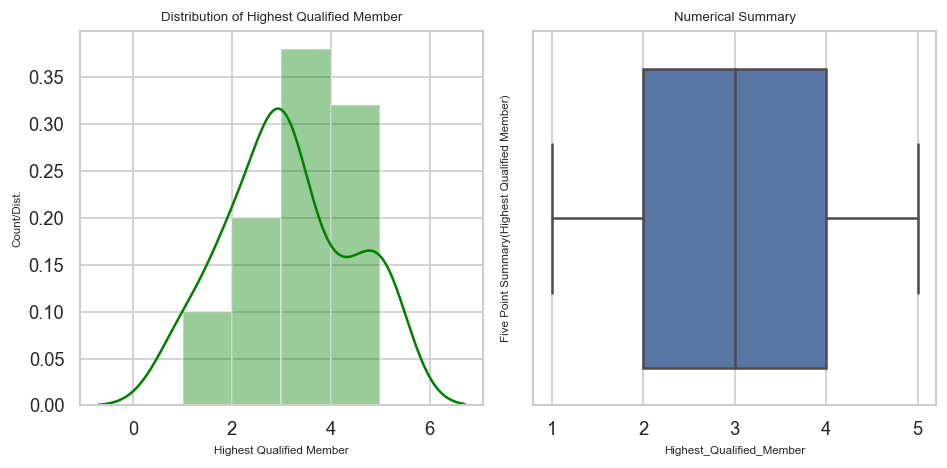

In [68]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))
plot0=sns.distplot(type_df[type_df['Highest_Qualified_Member']!=0]['Highest_Qualified_Member'],ax=axes[0],color='green')
axes[0].set_title('Distribution of Highest Qualified Member',fontdict={'fontsize':8})
axes[0].set_xlabel('Highest Qualified Member',fontdict={'fontsize':7})
axes[0].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
plt.tight_layout()

plot1=sns.boxplot(type_df[type_df['Highest_Qualified_Member']!=0]['Highest_Qualified_Member'],ax=axes[1],orient='v')
axes[1].set_title('Numerical Summary',fontdict={'fontsize':8})
axes[1].set_xlabel('Highest_Qualified_Member',fontdict={'fontsize':7})
axes[1].set_ylabel(r'Five Point Summary(Highest Qualified Member)',fontdict={'fontsize':7})
plt.tight_layout()

In [69]:
# Bảng thống kê trình độ học vấn: (Highest_Qualified_Member)
hq = df.groupby('Highest_Qualified_Member')['Highest_Qualified_Member'].count()
hq = pd.DataFrame(hq)
hq.columns = ['Frequency']
hq['Percent'] = hq/sum(hq['Frequency'])*100
hq

,Frequency,Percent
Highest_Qualified_Member,,
Graduate,19,38.0
Illiterate,5,10.0
Post-Graduate,6,12.0
Professional,10,20.0
Under-Graduate,10,20.0


Text(0, 0.5, 'Percent')

<Figure size 576x576 with 0 Axes>

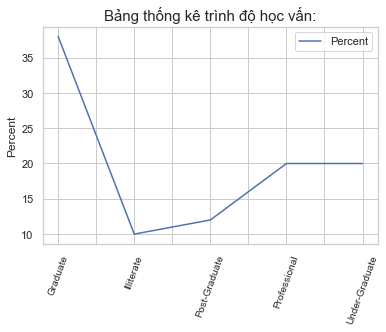

In [70]:
del hq['Frequency']
plt.figure(figsize=(8, 8))
hq.plot()
plt.xticks(rotation =70, fontsize=10)
plt.xticks(fontsize=10)
plt.title('Bảng thống kê trình độ học vấn:', fontsize=15)
plt.xlabel('', fontsize=15)
plt.ylabel('Percent', fontsize=12)

In [71]:
hq.reset_index(inplace=True)
hq

,Highest_Qualified_Member,Percent
0,Graduate,38.0
1,Illiterate,10.0
2,Post-Graduate,12.0
3,Professional,20.0
4,Under-Graduate,20.0


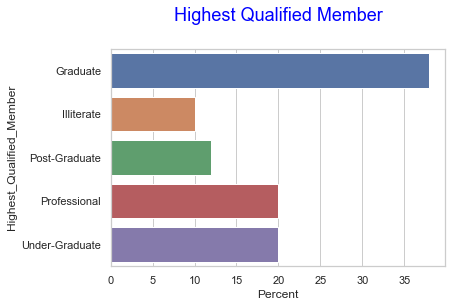

In [72]:
sns.barplot(y='Highest_Qualified_Member',x='Percent',data = hq )
plt.title('Highest Qualified Member', color = 'Blue', y = 1.1, fontsize = 18)
plt.show()

The Central Tendency

In [73]:
# Giá trị Trung bình
print("Giá trị trung bình của dataset:")
pd.DataFrame(df.mean())

Giá trị trung bình của dataset:


,0
Mthly_HH_Income,41558.00
Mthly_HH_Expense,18818.00
No_of_Fly_Members,4.06
Emi_or_Rent_Amt,3060.00
Annual_HH_Income,490019.04
No_of_Earning_Members,1.46


In [74]:
# Trung vị 
print("Trung vị của dataset:")
pd.DataFrame(df.median())

Trung vị của dataset:


,0
Mthly_HH_Income,35000.0
Mthly_HH_Expense,15500.0
No_of_Fly_Members,4.0
Emi_or_Rent_Amt,0.0
Annual_HH_Income,447420.0
No_of_Earning_Members,1.0


In [75]:
# Yếu vị
print("Yếu vị của dataset:")
df.mode().T

Yếu vị của dataset:


,0
Mthly_HH_Income,45000
Mthly_HH_Expense,25000
No_of_Fly_Members,4
Emi_or_Rent_Amt,0
Annual_HH_Income,590400
Highest_Qualified_Member,Graduate
No_of_Earning_Members,1


Dispersion

In [76]:
# Min
min_value = df.min(skipna= True, numeric_only= True)
print(min_value)
print('-'*50)

Mthly_HH_Income           5000
Mthly_HH_Expense          2000
No_of_Fly_Members            1
Emi_or_Rent_Amt              0
Annual_HH_Income         64200
No_of_Earning_Members        1
dtype: int64
--------------------------------------------------


In [77]:
# Max
max_value = df.max(skipna= True, numeric_only= True)
print(max_value)
print('-'*50)

Mthly_HH_Income           100000
Mthly_HH_Expense           50000
No_of_Fly_Members              7
Emi_or_Rent_Amt            35000
Annual_HH_Income         1404000
No_of_Earning_Members          4
dtype: int64
--------------------------------------------------


In [78]:
# Range/Phạm vi(độ biến thiên của dữ liệu)
print('Phạm vi của dữ liệu:')
print(max_value - min_value)
print('-'*50)

Phạm vi của dữ liệu:
Mthly_HH_Income            95000
Mthly_HH_Expense           48000
No_of_Fly_Members              6
Emi_or_Rent_Amt            35000
Annual_HH_Income         1339800
No_of_Earning_Members          3
dtype: int64
--------------------------------------------------


In [79]:
# Phương sai - Variance
print('Phương sai của dataset:')
df.var(skipna = True)

Phương sai của dataset:


Mthly_HH_Income          6.811009e+08
Mthly_HH_Expense         1.461733e+08
No_of_Fly_Members        2.302449e+00
Emi_or_Rent_Amt          3.895551e+07
Annual_HH_Income         1.024869e+11
No_of_Earning_Members    5.391837e-01
dtype: float64

In [80]:
# Tính độ lệch chuẩn - standard deviation
print("Độ lệch chuẩn của dataset:")
df.std(skipna = True)

Độ lệch chuẩn của dataset:


Mthly_HH_Income           26097.908979
Mthly_HH_Expense          12090.216824
No_of_Fly_Members             1.517382
Emi_or_Rent_Amt            6241.434948
Annual_HH_Income         320135.792123
No_of_Earning_Members         0.734291
dtype: float64

In [81]:
# Mô tả tổng quan dữ liệu
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Mthly_HH_Income,50.0,41558.00,26097.908979,5000.0,23550.0,35000.0,50375.0,100000.0
Mthly_HH_Expense,50.0,18818.00,12090.216824,2000.0,10000.0,15500.0,25000.0,50000.0
No_of_Fly_Members,50.0,4.06,1.517382,1.0,3.0,4.0,5.0,7.0
Emi_or_Rent_Amt,50.0,3060.00,6241.434948,0.0,0.0,0.0,3500.0,35000.0
Annual_HH_Income,50.0,490019.04,320135.792123,64200.0,258750.0,447420.0,594720.0,1404000.0
No_of_Earning_Members,50.0,1.46,0.734291,1.0,1.0,1.0,2.0,4.0


In [82]:
# coefficient of variation - Ma trận biểu diễn hệ số tương quan
data_mx = df.corr(method = "pearson")
data_mx

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,No_of_Earning_Members
Mthly_HH_Income,1.000000,0.649215,0.448317,0.036976,0.970315,0.347883
Mthly_HH_Expense,0.649215,1.000000,0.639702,0.405280,0.591222,0.311915
No_of_Fly_Members,0.448317,0.639702,1.000000,0.085808,0.430868,0.597482
Emi_or_Rent_Amt,0.036976,0.405280,0.085808,1.000000,0.002716,-0.097431
Annual_HH_Income,0.970315,0.591222,0.430868,0.002716,1.000000,0.296679
No_of_Earning_Members,0.347883,0.311915,0.597482,-0.097431,0.296679,1.000000


In [83]:
tanso_df=pd.crosstab(index=df['Highest_Qualified_Member'], columns=type_df['Type_Income'])
tanso_df

Type_Income,Low,Med,High,Huge
Highest_Qualified_Member,,,,
Graduate,3,11,4,1
Illiterate,2,2,1,0
Post-Graduate,1,2,1,2
Professional,0,7,1,2
Under-Graduate,5,4,0,1


<AxesSubplot:ylabel='Highest_Qualified_Member'>

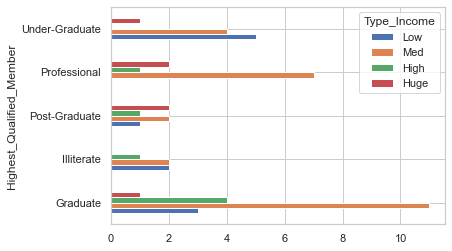

In [84]:
tanso_df.plot.barh()

In [85]:
# Phân loại mức thu nhập hộ gia đình:
# Huge >= 80000$ , High >= 50000$ , Medium >= 20000$, Low < 20000$
bins = [0, 20000, 50000, 80000, 100000]
type_df = df.copy()
type_df['Type_Income'] = pd.cut(type_df['Mthly_HH_Income'], bins, labels = ['Low', 'Med', 'High', 'Huge'])
type_df.sample(5)

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members,Type_Income
11,22000,25000,6,12000,279840,Illiterate,1,Med
13,24000,10500,6,0,316800,Graduate,2,Med
20,30500,25000,5,5000,351360,Under-Graduate,1,Med
43,80000,20000,4,0,1075200,Graduate,1,High
14,24000,10000,4,0,244800,Graduate,2,Med


In [86]:
type_df['Số dư hàng tháng'] = type_df['Mthly_HH_Income'] - type_df['Mthly_HH_Expense'] - type_df['Emi_or_Rent_Amt']
type_df

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members,Type_Income,Số dư hàng tháng
0,5000,8000,3,2000,64200,Under-Graduate,1,Low,-5000
1,6000,7000,2,3000,79920,Illiterate,1,Low,-4000
2,10000,4500,2,0,112800,Under-Graduate,1,Low,5500
3,10000,2000,1,0,97200,Illiterate,1,Low,8000
4,12500,12000,2,3000,147000,Graduate,1,Low,-2500
5,14000,8000,2,0,196560,Graduate,1,Low,6000
6,15000,16000,3,35000,167400,Post-Graduate,1,Low,-36000
7,18000,20000,5,8000,216000,Graduate,1,Low,-10000
8,19000,9000,2,0,218880,Under-Graduate,1,Low,10000
9,20000,9000,4,0,220800,Under-Graduate,2,Low,11000


In [87]:
type_df['Số dư hàng tháng'].describe()

count       50.000000
mean     19680.000000
std      22486.794311
min     -36000.000000
25%       5125.000000
50%      17000.000000
75%      30875.000000
max      73000.000000
Name: Số dư hàng tháng, dtype: float64

In [88]:
Types = []
for x in type_df['Số dư hàng tháng']:
  if x < 0: Types.append("Nợ")
  elif 0 < x <= 5000: Types.append("Mức dư ít")
  elif 5000 < x <= 25000:Types.append("Khá giả")
  elif 25000 < x <= 60000: Types.append("Giàu")
  else : Types.append("Siêu giàu")
type_df.insert(9,"Mức sống",Types)

C:\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Số dư hàng tháng', ylabel='Density'>

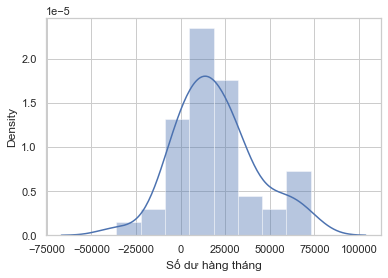

In [89]:
sns.distplot(type_df["Số dư hàng tháng"])

In [90]:
z = type_df.groupby('Mức sống')['Mức sống'].count()
z = pd.DataFrame(z)
z.columns = ['Số lượng']
z['Phần trăm']= z/sum(z['Số lượng'])*100
z

,Số lượng,Phần trăm
Mức sống,,
Giàu,15,30.0
Khá giả,19,38.0
Mức dư ít,4,8.0
Nợ,8,16.0
Siêu giàu,4,8.0


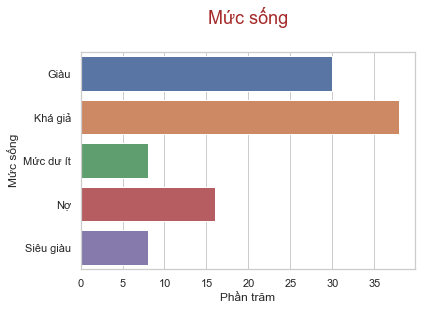

In [91]:
z.reset_index(inplace=True)
sns.barplot(y='Mức sống',x='Phần trăm',data = z)
plt.title('Mức sống', color = 'Brown', y = 1.1, fontsize = 18)
plt.show()